In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import scipy as sp

In [4]:
df = pd.read_csv('Covid Data.csv')
df.head(20)

df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99', pd.NaT)
# df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])


In [38]:
df.duplicated().sum()


812049

In [48]:
df["ICU"].unique()

array([97,  2,  1, 99])

In [49]:
temp_list = [97, 99]

df_do_analizy = df[(~df["ICU"].isin(temp_list))&(~df["TOBACCO"].isin(temp_list))&(~df["RENAL_CHRONIC"].isin(temp_list))&(~df["OBESITY"].isin(temp_list))& (~df["CARDIOVASCULAR"].isin(temp_list))& (~df["OTHER_DISEASE"].isin(temp_list))& (~df["HIPERTENSION"].isin(temp_list))& (~df["INTUBED"].isin(temp_list)) & (~df["PNEUMONIA"].isin(temp_list)) & (~df["PREGNANT"].isin(temp_list)) & (~df["DIABETES"].isin(temp_list))& (~df["INTUBED"].isin(temp_list)) & (~df["PNEUMONIA"].isin(temp_list)) & (~df["COPD"].isin(temp_list)) & (~df["ASTHMA"].isin(temp_list)) & (~df["INMSUPR"].isin(temp_list))]

In [55]:
df_do_analizy["DIAGNOSED_COVID"] = np.where((df_do_analizy["CLASIFFICATION_FINAL"] > 3), 2, 1)

/tmp/ipykernel_9903/4166830877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_do_analizy["DIAGNOSED_COVID"] = np.where((df_do_analizy["CLASIFFICATION_FINAL"] > 3), 2, 1)


In [58]:
sp.stats.pearsonr(df_do_analizy["AGE"], df_do_analizy["PNEUMONIA"], alternative='two-sided', method=None) #korelacja jest istotnia, ale jest słaba

PearsonRResult(statistic=-0.16663217342261222, pvalue=0.0)

In [56]:
df_do_analizy

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD?,DIAGNOSED_COVID
5,2,1,1,2,NaN,2,1,40,2,2,...,2,2,2,2,2,2,3,2,2,1
8,2,1,1,2,NaN,2,2,37,2,1,...,1,2,2,1,2,2,3,2,2,1
9,2,1,1,2,NaN,2,2,25,2,2,...,2,2,2,2,2,2,3,2,2,1
16,2,1,1,2,NaN,2,1,80,2,2,...,1,2,2,2,2,2,3,1,2,1
56,2,1,1,2,NaN,1,1,58,2,2,...,1,2,1,1,2,2,7,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048535,1,13,1,2,NaN,2,2,79,2,2,...,1,2,2,2,2,2,7,2,2,2
1048553,2,13,1,2,NaN,2,1,61,2,1,...,1,2,2,2,2,2,7,2,2,2
1048554,2,13,1,2,NaN,2,1,63,2,2,...,2,2,2,1,2,2,7,2,2,2
1048567,1,13,1,2,NaN,2,2,23,2,1,...,2,2,2,1,2,2,7,2,2,2


In [14]:
a = df.head()["DATE_DIED"]
print(a)
print(type(a))

0    03/05/2020
1    03/06/2020
2    09/06/2020
3    12/06/2020
4    21/06/2020
Name: DATE_DIED, dtype: object
<class 'pandas.core.series.Series'>


In [17]:
df["DEAD?"] = np.where(df["DATE_DIED"].isnull(), 2, 1)

In [18]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD?
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,NaN,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,NaN,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,NaN,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,2


In [37]:
df_mod = df.drop_duplicates()

In [19]:
df.head(100)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD?
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,1,1,1,NaN,97,2,49,2,2,...,2,2,2,2,2,2,2,7,97,2
96,2,1,1,1,NaN,97,2,24,2,2,...,2,2,2,2,2,2,2,7,97,2
97,2,1,2,1,NaN,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,2
98,2,1,2,1,NaN,97,2,27,97,2,...,2,2,2,2,2,2,1,7,97,2


In [40]:


age = df_mod["AGE"]
age.info()

age.hasnans #sprawdzam, czy są puste wartości w tym series


<class 'pandas.core.series.Series'>
Index: 236526 entries, 0 to 1048574
Series name: AGE
Non-Null Count   Dtype
--------------   -----
236526 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


False

In [ ]:
age.quantile(.99) # 99ty percentyl to wiek 90 lat 

In [ ]:
avg_age = df_mod["AGE"].mean()
avg_age

In [41]:
df_mod.AGE.value_counts()



AGE
56     5047
60     4909
59     4878
57     4854
55     4802
       ... 
118       2
115       2
111       1
121       1
113       1
Name: count, Length: 121, dtype: int64

In [20]:
df_mod['AGE'].min()

0

In [19]:
df_mod['AGE'].max()

121

(array([7.3450e+03, 1.1188e+04, 3.0226e+04, 4.4541e+04, 5.7004e+04,
        4.9316e+04, 2.8565e+04, 7.8530e+03, 4.5800e+02, 3.0000e+01]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

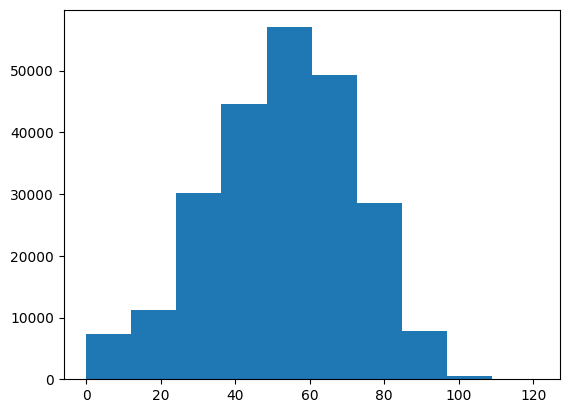

In [18]:
plt.hist(data = df_mod, x= "AGE")

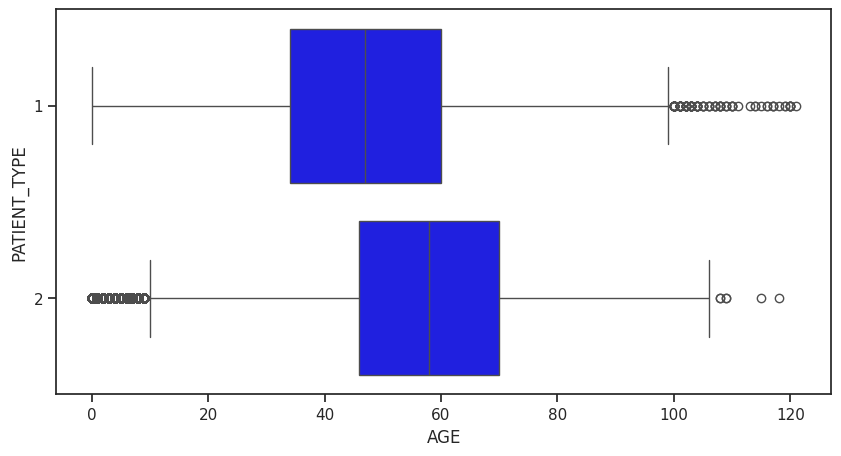

In [72]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("ticks")
ax = sns.boxplot(x="AGE", y="PATIENT_TYPE", data=df_mod, orient='h', color = 'blue')


In [23]:

df_died = df_mod.query('~DATE_DIED.isnull()')
df_died.count()

USMER                   75965
MEDICAL_UNIT            75965
SEX                     75965
PATIENT_TYPE            75965
DATE_DIED               75965
INTUBED                 75965
PNEUMONIA               75965
AGE                     75965
PREGNANT                75965
DIABETES                75965
COPD                    75965
ASTHMA                  75965
INMSUPR                 75965
HIPERTENSION            75965
OTHER_DISEASE           75965
CARDIOVASCULAR          75965
OBESITY                 75965
RENAL_CHRONIC           75965
TOBACCO                 75965
CLASIFFICATION_FINAL    75965
ICU                     75965
dtype: int64

In [21]:
df_mod.query('~DATE_DIED.isnull()').count()

USMER                   75965
MEDICAL_UNIT            75965
SEX                     75965
PATIENT_TYPE            75965
DATE_DIED               75965
INTUBED                 75965
PNEUMONIA               75965
AGE                     75965
PREGNANT                75965
DIABETES                75965
COPD                    75965
ASTHMA                  75965
INMSUPR                 75965
HIPERTENSION            75965
OTHER_DISEASE           75965
CARDIOVASCULAR          75965
OBESITY                 75965
RENAL_CHRONIC           75965
TOBACCO                 75965
CLASIFFICATION_FINAL    75965
ICU                     75965
dtype: int64

In [24]:
df_died["USMER"].count()/df_mod["USMER"].count() # wskaźnik śmiertelności populacji

0.321169765691721

In [25]:
df_died["AGE"].mean() #średnia wieku pacjentów, którzy zmarli to 60 lat
df_mod["AGE"].mean()  # podczas gdy średnia wieku populacji to 53 lata

52.62027430388203

In [26]:
df_mod.query("SEX ==1").count() # w analizowanej populacji jest 107023 kobiet (analogicznie dla SEX ==2, jest 129503 mężczyzn)


USMER                   107023
MEDICAL_UNIT            107023
SEX                     107023
PATIENT_TYPE            107023
DATE_DIED                27217
INTUBED                 107023
PNEUMONIA               107023
AGE                     107023
PREGNANT                107023
DIABETES                107023
COPD                    107023
ASTHMA                  107023
INMSUPR                 107023
HIPERTENSION            107023
OTHER_DISEASE           107023
CARDIOVASCULAR          107023
OBESITY                 107023
RENAL_CHRONIC           107023
TOBACCO                 107023
CLASIFFICATION_FINAL    107023
ICU                     107023
dtype: int64

In [42]:
df_mod.query("SEX ==1")["DATE_DIED"].count()/ df_mod.query("SEX ==1")["USMER"].count() # wskaźnik zgonów wśród kobiet

0.2543098212533754

In [19]:
df_died.query("SEX ==1")["AGE"].mean() #średnia wieku wśród zmarłych kobiet

62.28430760186648

In [20]:
df_died.query("SEX ==1")["AGE"].max() #najstarsza denatka miała 119 lat

119

In [21]:
df_died.query("SEX ==1")["AGE"].min() #najstarsza denatka miała 0 lat :( może martwy poród u ciężarnej chorej na COVID? 

0

In [22]:
df_mod.query("SEX ==2")["DATE_DIED"].count()/ df_mod.query("SEX ==2")["USMER"].count() # wskaźnik zgonów wśród mężczyzn

0.37642371219199555

In [23]:
df_mod.query("SEX ==1").count()/df_mod.count() # kobiety stanowią 45% populacji

USMER                   0.452479
MEDICAL_UNIT            0.452479
SEX                     0.452479
PATIENT_TYPE            0.452479
DATE_DIED               0.358283
INTUBED                 0.452479
PNEUMONIA               0.452479
AGE                     0.452479
PREGNANT                0.452479
DIABETES                0.452479
COPD                    0.452479
ASTHMA                  0.452479
INMSUPR                 0.452479
HIPERTENSION            0.452479
OTHER_DISEASE           0.452479
CARDIOVASCULAR          0.452479
OBESITY                 0.452479
RENAL_CHRONIC           0.452479
TOBACCO                 0.452479
CLASIFFICATION_FINAL    0.452479
ICU                     0.452479
dtype: float64

In [29]:
df_died.query("PREGNANT == 1") # zmarło 89 kobiet w ciąży, ich średnia wieku to -----> patrz poniżej

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
969,2,3,1,2,13/06/2020,1,1,23,1,2,...,2,2,2,2,2,1,2,2,3,1
1735,1,3,1,2,28/07/2020,1,1,30,1,2,...,2,2,2,2,2,2,2,2,3,1
1787,2,3,1,2,08/08/2020,2,1,33,1,2,...,2,2,2,1,2,2,2,2,3,2
20031,1,4,1,2,27/03/2020,2,2,30,1,2,...,2,2,2,2,2,1,2,2,7,1
20473,1,4,1,2,08/04/2020,1,1,26,1,2,...,2,2,2,1,2,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468363,1,12,1,2,27/07/2020,1,1,36,1,2,...,2,2,2,2,2,2,2,2,3,1
468580,1,12,1,2,30/07/2020,2,1,24,1,2,...,2,2,2,2,2,2,2,2,3,2
468766,1,12,1,1,03/08/2020,97,2,36,1,2,...,1,2,2,2,2,2,2,2,3,97
468771,2,12,1,2,03/08/2020,1,1,29,1,2,...,2,2,2,2,2,2,2,2,3,1


In [27]:
df_died.query("PREGNANT == 1")["AGE"].mean() # ---> ich średnia wieku to 31 lat (dla przypomnienia średnia wieku zmarłej kobiety to 62 lata)

31.134831460674157

In [28]:
df_died.query("PREGNANT != 1")["AGE"].mean() # średnia wieku zmarłej kobiety niebędącej w ciąży (lub brak danych (kod 97))

61.09743528915599

In [27]:
#zapalenie płuc a śmiertelność

df_mod.query("PNEUMONIA ==1").count() # 99730 osób z populacji zachorowało na zapalenie płuc

USMER                   99730
MEDICAL_UNIT            99730
SEX                     99730
PATIENT_TYPE            99730
DATE_DIED               53110
INTUBED                 99730
PNEUMONIA               99730
AGE                     99730
PREGNANT                99730
DIABETES                99730
COPD                    99730
ASTHMA                  99730
INMSUPR                 99730
HIPERTENSION            99730
OTHER_DISEASE           99730
CARDIOVASCULAR          99730
OBESITY                 99730
RENAL_CHRONIC           99730
TOBACCO                 99730
CLASIFFICATION_FINAL    99730
ICU                     99730
dtype: int64

In [28]:
df_mod.query("PNEUMONIA ==1")["USMER"].count()/df_mod["USMER"].count() # osoby z zapaleniem płuc stanowiły 42% populacji

0.4216449777191514

In [29]:
df_died.query("PNEUMONIA ==1")["USMER"].count()/df_died["USMER"].count() # ale uwaga! osoby z zapaleniem płuc stanowiły prawie 70% zmarłej populacju. Wniosek --> zachorowanie na zapalenie płuc zwiększa ryzyko śmierci w wyniku COVID

0.6991377608108997

In [51]:
#wskaźniki zachorowania na zapalenie płuc
pneumonia = df_mod.query('PNEUMONIA == 1')['PNEUMONIA'].count()
not_pneumonia = df_mod.query('PNEUMONIA == 2 or PNEUMONIA == 99')['PNEUMONIA'].count()

pneumonia_proportion = pneumonia / df_mod['PNEUMONIA'].count()
not_pneumonia_proportion = not_pneumonia / df_mod['PNEUMONIA'].count()

#wskaźniki śmiertelności wśród chorych na zapalenie płuc

died_pneumonia = df_died.query('PNEUMONIA == 1')['PNEUMONIA'].count()
died_not_pneumonia = df_died.query('PNEUMONIA == 2 or PNEUMONIA == 99')['PNEUMONIA'].count()

died_pneumonia_proportion = died_pneumonia / df_died['PNEUMONIA'].count()
died_not_pneumonia_proportion = died_not_pneumonia / df_died['PNEUMONIA'].count()


died_proportion = df_died["USMER"].count()/df_mod["USMER"].count()

not_died_proportion = 1 - died_proportion

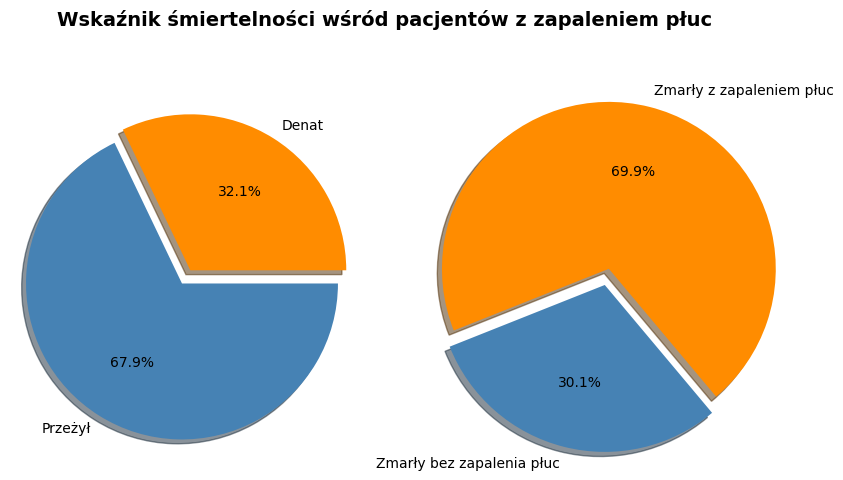

In [59]:
plt.figure(figsize = [10, 5])

# # wykres slupkowy
# plt.subplot(1, 2, 1)

# g = sns.countplot(data=df_mod, x="PNEUMONIA", order=df_mod.PNEUMONIA.value_counts().index)
# g.set_xlabel('Czy zapalenie płuc?')
# g.set_ylabel('#Liczba pacjentów')

# # cpie chart
# plt.subplot(1, 2, 1)

# labels = ['Pacjent z zapaleniem płuc', 'Pacjent bez zapalenia płuc']
# sizes = [pneumonia_proportion, not_pneumonia_proportion]
# colors = ['darkorange', 'steelblue']
# explode = (0, 0.1)

# plt.pie(sizes, explode=explode, labels=labels, colors = colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# plt.axis('equal')



plt.subplot(1, 2, 1)

labels = ['Denat', 'Przeżył']
sizes = [died_proportion, not_died_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')




plt.subplot(1, 2, 2)

labels = ['Zmarły z zapaleniem płuc', 'Zmarły bez zapalenia płuc']
sizes = [died_pneumonia_proportion, died_not_pneumonia_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=-50)
plt.axis('equal')



plt.suptitle('Wskaźnik śmiertelności wśród pacjentów z zapaleniem płuc', y=1.03, fontsize=14, fontweight='semibold');


# uwaga - na slajdzie należy dodać komentarz ---> Podczas gdyt współczynnik śmiertelności w populacji to 32%, śmiertelność wśród chorych na zap. płuc to aż 70%

In [30]:
df_mod.query("DIABETES ==1")["USMER"].count()/df_mod["USMER"].count() # diabetycy stanowią 31% populacji

0.31183041187860955

In [31]:
df_died.query("DIABETES ==1")["USMER"].count()/df_died["USMER"].count() # wśród osób zmarłych diabetycy stanowią 37 %

0.36956493121832423

In [32]:
df_mod.query("COPD ==1")["USMER"].count()/df_mod["USMER"].count()

0.05948183286404032

In [33]:
df_mod.query("COPD ==1").count()

USMER                   14069
MEDICAL_UNIT            14069
SEX                     14069
PATIENT_TYPE            14069
DATE_DIED                4019
INTUBED                 14069
PNEUMONIA               14069
AGE                     14069
PREGNANT                14069
DIABETES                14069
COPD                    14069
ASTHMA                  14069
INMSUPR                 14069
HIPERTENSION            14069
OTHER_DISEASE           14069
CARDIOVASCULAR          14069
OBESITY                 14069
RENAL_CHRONIC           14069
TOBACCO                 14069
CLASIFFICATION_FINAL    14069
ICU                     14069
dtype: int64

In [34]:
df_died.query("COPD ==1").count()/df_mod.query("COPD ==1").count() #wskaźnik śmiertelności wśród pacjentów z przewlekłą obturacyjną chorobą płuc to 29%, przy ogólnym wskaźniku śmiertelności wynoszącym 32% (policzone wyżej)

USMER                   0.285664
MEDICAL_UNIT            0.285664
SEX                     0.285664
PATIENT_TYPE            0.285664
DATE_DIED               1.000000
INTUBED                 0.285664
PNEUMONIA               0.285664
AGE                     0.285664
PREGNANT                0.285664
DIABETES                0.285664
COPD                    0.285664
ASTHMA                  0.285664
INMSUPR                 0.285664
HIPERTENSION            0.285664
OTHER_DISEASE           0.285664
CARDIOVASCULAR          0.285664
OBESITY                 0.285664
RENAL_CHRONIC           0.285664
TOBACCO                 0.285664
CLASIFFICATION_FINAL    0.285664
ICU                     0.285664
dtype: float64

In [35]:
df_died["USMER"].count()

75965

In [60]:
df_healthy = df_mod.query("DIABETES == 2 & COPD ==2 & ASTHMA ==2 & INMSUPR == 2 & HIPERTENSION ==2 & OTHER_DISEASE ==2 & CARDIOVASCULAR ==2 & RENAL_CHRONIC==2") #wyszukane osoby, które nie mają żadnych chorób współistniejących

In [37]:
df_healthy.query("PNEUMONIA ==1").count()/df_healthy["USMER"].count() # prawie 45% osób tzw. zdrowych (bez chorób współistniejących) zachorowało na zapalenie płuc. 

# co ciekawe --- > wskaźnik zachorowań na zapalenie płuc w całej populacji to 42% (policzone powyżej). Zatem brak chorób współistniejących nie obniża ryzyka zachorowania na zapalenie płuc.


USMER                   0.448972
MEDICAL_UNIT            0.448972
SEX                     0.448972
PATIENT_TYPE            0.448972
DATE_DIED               0.241388
INTUBED                 0.448972
PNEUMONIA               0.448972
AGE                     0.448972
PREGNANT                0.448972
DIABETES                0.448972
COPD                    0.448972
ASTHMA                  0.448972
INMSUPR                 0.448972
HIPERTENSION            0.448972
OTHER_DISEASE           0.448972
CARDIOVASCULAR          0.448972
OBESITY                 0.448972
RENAL_CHRONIC           0.448972
TOBACCO                 0.448972
CLASIFFICATION_FINAL    0.448972
ICU                     0.448972
dtype: float64

In [56]:
df_mod.query("DIABETES == 1 or COPD ==1 or ASTHMA ==1 or INMSUPR == 1 or HIPERTENSION ==1 or OTHER_DISEASE ==1 or CARDIOVASCULAR ==1 or RENAL_CHRONIC==1") #osoby, które cierpią na co najmniej jedną przewlekłą chorobę

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
7,2,1,1,1,NaT,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048561,2,13,2,1,NaN,97,2,45,97,2,...,2,2,1,1,1,2,2,1,7,97
1048567,1,13,1,2,NaN,2,2,23,2,1,...,2,2,2,2,2,1,2,2,7,2
1048568,1,13,2,1,NaN,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,NaN,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2


In [59]:
df_mod.query("DIABETES == 1 or COPD ==1 or ASTHMA ==1 or INMSUPR == 1 or HIPERTENSION ==1 or OTHER_DISEASE ==1 or CARDIOVASCULAR ==1 or RENAL_CHRONIC==1")["USMER"].count()/df_mod["USMER"].count() #osoby chorujące przewlekle na co najmniej jedną chorobę stanowią 65% populacji

0.6532939296314147

In [62]:
df_died.query("DIABETES == 1 or COPD ==1 or ASTHMA ==1 or INMSUPR == 1 or HIPERTENSION ==1 or OTHER_DISEASE ==1 or CARDIOVASCULAR ==1 or RENAL_CHRONIC==1")["USMER"].count()/df_died["USMER"].count() #Stosunek zmarłych chorujących przewlekle do wszystkich zmarłych jest nieco niższy niż współczynnik osób chorych w populacji

0.6300138221549397

In [39]:
# Ile osób jest otyłych?
df_mod.query("OBESITY ==1").count()/df_mod["USMER"].count()


USMER                   0.267742
MEDICAL_UNIT            0.267742
SEX                     0.267742
PATIENT_TYPE            0.267742
DATE_DIED               0.072871
INTUBED                 0.267742
PNEUMONIA               0.267742
AGE                     0.267742
PREGNANT                0.267742
DIABETES                0.267742
COPD                    0.267742
ASTHMA                  0.267742
INMSUPR                 0.267742
HIPERTENSION            0.267742
OTHER_DISEASE           0.267742
CARDIOVASCULAR          0.267742
OBESITY                 0.267742
RENAL_CHRONIC           0.267742
TOBACCO                 0.267742
CLASIFFICATION_FINAL    0.267742
ICU                     0.267742
dtype: float64

In [46]:
df_died.query("OBESITY ==1").count()/df_died["USMER"].count() #W populacji jest ~27% osób otyłych. Wskaźnik zmarłych otyłych to 22%, zatem otyłość nie podwyższa ryzyka śmiertelności.

USMER                   0.226894
MEDICAL_UNIT            0.226894
SEX                     0.226894
PATIENT_TYPE            0.226894
DATE_DIED               0.226894
INTUBED                 0.226894
PNEUMONIA               0.226894
AGE                     0.226894
PREGNANT                0.226894
DIABETES                0.226894
COPD                    0.226894
ASTHMA                  0.226894
INMSUPR                 0.226894
HIPERTENSION            0.226894
OTHER_DISEASE           0.226894
CARDIOVASCULAR          0.226894
OBESITY                 0.226894
RENAL_CHRONIC           0.226894
TOBACCO                 0.226894
CLASIFFICATION_FINAL    0.226894
ICU                     0.226894
dtype: float64

In [44]:
df_mod.query('TOBACCO ==1')["USMER"].count()/df_mod["USMER"].count() # 14 % populacji stanowią palacze

0.13793409604018164

In [49]:
df_died.query("TOBACCO ==1").count()/df_died["USMER"].count() #wśród populacji zmarłych palacze stanowią niecałe 9%, czyli jest niższy odsetek palaczy wśród denatów niż w całej populacji (co mnie zaskoczyło)

USMER                   0.086724
MEDICAL_UNIT            0.086724
SEX                     0.086724
PATIENT_TYPE            0.086724
DATE_DIED               0.086724
INTUBED                 0.086724
PNEUMONIA               0.086724
AGE                     0.086724
PREGNANT                0.086724
DIABETES                0.086724
COPD                    0.086724
ASTHMA                  0.086724
INMSUPR                 0.086724
HIPERTENSION            0.086724
OTHER_DISEASE           0.086724
CARDIOVASCULAR          0.086724
OBESITY                 0.086724
RENAL_CHRONIC           0.086724
TOBACCO                 0.086724
CLASIFFICATION_FINAL    0.086724
ICU                     0.086724
dtype: float64

In [53]:
df_mod.query('PNEUMONIA ==1 & OBESITY ==1')["USMER"].count()/df_mod.query("OBESITY ==1")["USMER"].count() #wskaźnik zapaleń płuc wśród otyłych pacjentów jest nieznacznie niższy od wskaźnika zapaleń płuc w populacji (42%)

0.4032655381505811

In [ ]:
df_mod.query("DIABETES == 2  COPD ==2 & ASTHMA ==2 & INMSUPR == 2 & HIPERTENSION ==2 & OTHER_DISEASE ==2 & CARDIOVASCULAR ==2 & RENAL_CHRONIC==2")

In [64]:
# Hospitalizowany czy odesłany do domu?
# 1 - returned home
# 2 - hospitalizacja

df_died.query("PATIENT_TYPE ==1")["USMER"].count()/df_died["USMER"].count() #spośród wszystkich zmarłych pacjentów 9% stanowili odesłani do domu

0.09019943394984532

In [68]:
df_died.query("PATIENT_TYPE ==1")["USMER"].count()/df_mod.query("PATIENT_TYPE ==1")["USMER"].count() #śmiertelność wśród pacjentów odesłanych do domu to 7%

0.06860094911996155

In [65]:
df_died.query("PATIENT_TYPE ==2")["USMER"].count()/df_died["USMER"].count() #spośród wszystkich zmarłych pacjentów 90% stanowili hospitalizowani

0.9098005660501547

In [67]:
#śmiertelność wśród hospitalizowanych osób --->

df_died.query("PATIENT_TYPE ==2")["USMER"].count()/df_mod.query("PATIENT_TYPE ==2")["USMER"].count() # ---> wynosi 51%

0.5057887649658968

In [70]:
df_died.query("PATIENT_TYPE ==1 and PNEUMONIA==1")["USMER"].count()/df_mod.query("PATIENT_TYPE ==1 and PNEUMONIA==1")["USMER"].count() #Fakt odesłania do domu pacjenta z zapaleniem płuc nie zwiększa ryzyka jego śmierci. Współczynnik śmierci pacjenta z zapaleniem płuc, który został odesłany do domu wynosi 25%.

0.24779395939450463

In [74]:
#CLASSIFICATION_FINAL {1,2,3} oznacza, że był zdiagnozowany COVID, {4,5,6,7} nie był zdiagnozowany lub test był niejednoznaczny

df_died.query("CLASIFFICATION_FINAL == 1 or CLASIFFICATION_FINAL == 2 or CLASIFFICATION_FINAL == 3")["USMER"].count()/df_mod.query("CLASIFFICATION_FINAL == 1 or CLASIFFICATION_FINAL == 2 or CLASIFFICATION_FINAL == 3")["USMER"].count()

#śmiertelność wśród pacjentów ze zdiagnozywanym wirusem COVID-19 jest wyższa niż w populacji

0.4709060094626086

In [75]:
#ICU - OIOM

df_died.query("ICU ==1")["USMER"].count()/df_died["USMER"].count() #10% wszystkich zmarłych przebywało na oddziale intensywnej terapii

0.1074837096031067

In [81]:
# df_mod["DEAD"] = df_mod.query("DATE_DIED == 1") nie działa !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! chcę dodać kolumnę z informacją czy osobnik umarł (DEAD: True or False, albo jakieś 1 vs 2 zgodnie z konwencją)

In [51]:
df_do_analizy["AGE"].corr(df_do_analizy["PNEUMONIA"], method='pearson', min_periods=None) #brak korelacji między wiekiem a zapaleniem płuc

-0.16663217342261227

In [80]:
df["USMER"].corr(df["ICU"], method='pearson', min_periods=None) #korelacja między referencyjnością oddziału (USMER) a hospitalizacją na OIOM

0.17490084006917128

/home/kata/apps/anaconda3/envs/python_intro/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/kata/apps/anaconda3/envs/python_intro/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


CPU times: user 126 ms, sys: 7.62 ms, total: 133 ms
Wall time: 138 ms


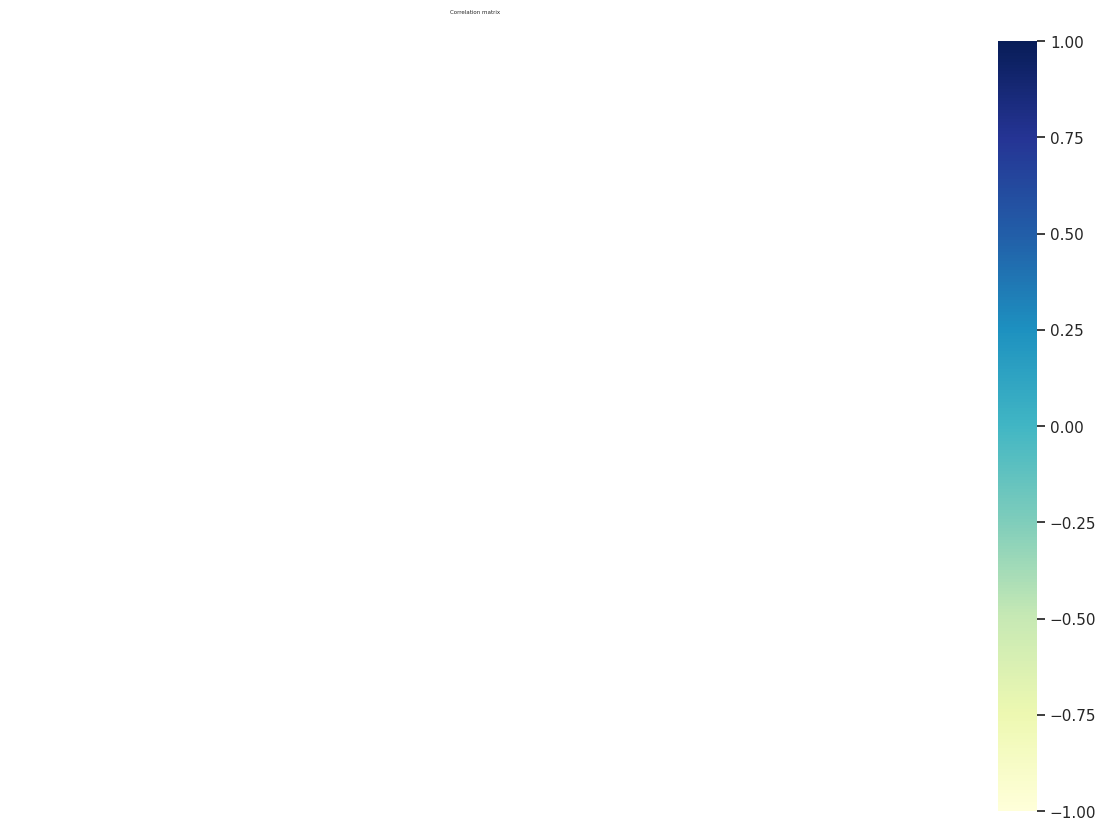

In [80]:

plt.rcParams['figure.figsize']=(15,10)
%time ax = sns.heatmap(df_mod[df_mod.columns[:-21]].corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu")
plt.title("Correlation matrix", fontsize=4, y=1.025)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

CPU times: user 1.25 s, sys: 33.9 ms, total: 1.28 s
Wall time: 1.61 s


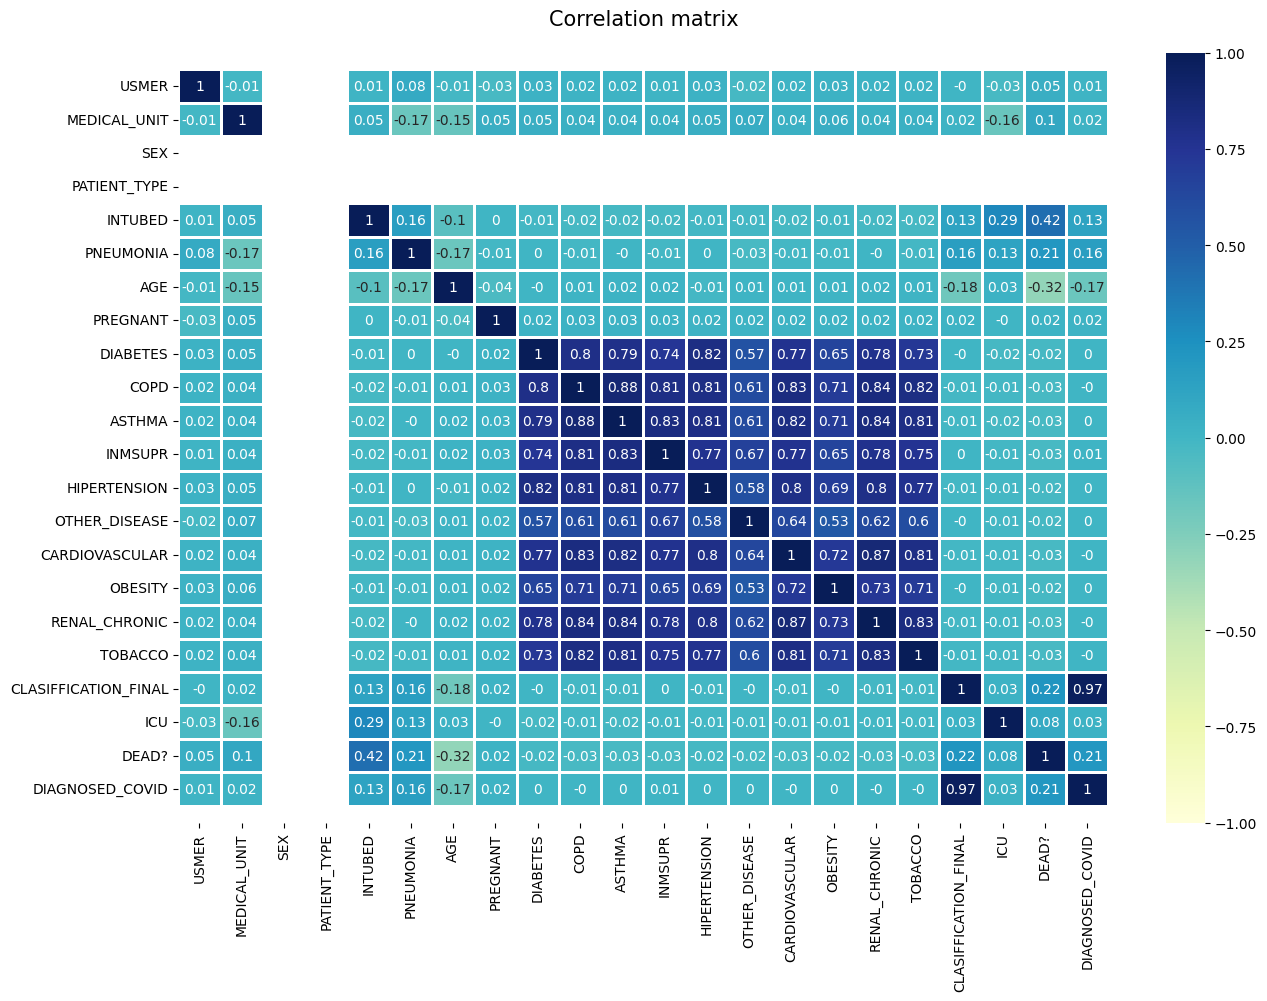

In [64]:
# plot correlation matrix ---> na datasecie train.csv

plt.rcParams['figure.figsize']=(15,10)
%time ax = sns.heatmap(round(df_do_analizy.loc[:, df_do_analizy.columns != 'DATE_DIED'].corr(), 2), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu")
plt.title("Correlation matrix", fontsize=15, y=1.025);

# correcting matplotlib issue with cutting edges
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [65]:
round(df_do_analizy.loc[:, df_do_analizy.columns != 'DATE_DIED'].corr(), 2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD?,DIAGNOSED_COVID
USMER,1.00,-0.01,NaN,NaN,0.01,0.08,-0.01,-0.03,0.03,0.02,...,0.03,-0.02,0.02,0.03,0.02,0.02,-0.00,-0.03,0.05,0.01
MEDICAL_UNIT,-0.01,1.00,NaN,NaN,0.05,-0.17,-0.15,0.05,0.05,0.04,...,0.05,0.07,0.04,0.06,0.04,0.04,0.02,-0.16,0.10,0.02
SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PATIENT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,0.01,0.05,NaN,NaN,1.00,0.16,-0.10,0.00,-0.01,-0.02,...,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,0.13,0.29,0.42,0.13
PNEUMONIA,0.08,-0.17,NaN,NaN,0.16,1.00,-0.17,-0.01,0.00,-0.01,...,0.00,-0.03,-0.01,-0.01,-0.00,-0.01,0.16,0.13,0.21,0.16
AGE,-0.01,-0.15,NaN,NaN,-0.10,-0.17,1.00,-0.04,-0.00,0.01,...,-0.01,0.01,0.01,0.01,0.02,0.01,-0.18,0.03,-0.32,-0.17
PREGNANT,-0.03,0.05,NaN,NaN,0.00,-0.01,-0.04,1.00,0.02,0.03,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,-0.00,0.02,0.02
DIABETES,0.03,0.05,NaN,NaN,-0.01,0.00,-0.00,0.02,1.00,0.80,...,0.82,0.57,0.77,0.65,0.78,0.73,-0.00,-0.02,-0.02,0.00
COPD,0.02,0.04,NaN,NaN,-0.02,-0.01,0.01,0.03,0.80,1.00,...,0.81,0.61,0.83,0.71,0.84,0.82,-0.01,-0.01,-0.03,-0.00
